In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import statistics as st
from calendar import isleap

In [2]:
# Read Orography
OroData = xr.open_dataset('../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5IGP_Orography.nc')
OroD = OroData.sel(latitude=slice(32,24),longitude=slice(74,86))
# create mask
oro = OroD.z
oro.values = OroD.z.values/9.81
oro.attrs
oro.attrs['units']='meter'
oro.attrs['long_name']='Orography'
oro.values[oro.values>500.1]=np.NaN
mask=oro.values/oro.values

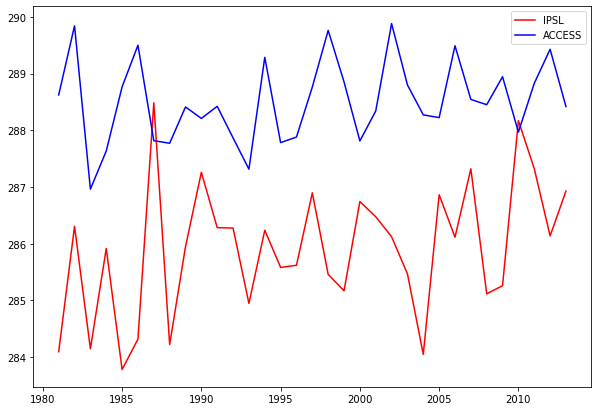

In [6]:
t2mHistvals=[]
# t2m Data
t2mDataIPSL = xr.open_dataset('../../Data/CMIP6/IPSL-CM6A-LR/NDJF/Regrid_NH_tas_NDJFday_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-20141231.nc')
t2mDataIPSL.tas.time[0]
histt2mIPSL=t2mDataIPSL.sel(latitude=slice(32,24),longitude=slice(74,86)).tas
#histt2m[0].values
histt2mIPSL[1].values
histt2mIPSL.values=histt2mIPSL.values*mask

# Area Average
t2mTS1=histt2mIPSL.mean(dim=['latitude','longitude'], skipna=True)
t2mTs=(t2mTS1[((t2mTS1.time.dt.month>11) | (t2mTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
x=np.arange(1981,2014)
histt2mTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
    t2mT=t2mTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histt2mTs.append(t2mT.mean())
t2mHistvals.append(histt2mTs) 



# t2m Data
t2mDataACCESS = xr.open_dataset('../../Data/CMIP6/ACCESS-CM2/tasNHRegrid_NDJFday_ACCESS-CM2_historical_r1i1p1f1_gn_19500101-20141231.nc')
t2mDataACCESS.tas.time[0]
histt2m=t2mDataACCESS.sel(latitude=slice(32,24),longitude=slice(74,86)).tas

#histt2m.values=histt2m.values-histt2m[0].values
histt2m[1].values
histt2m.values=histt2m.values*mask


# Area Average
t2mTS1=histt2m.mean(dim=['latitude','longitude'], skipna=True)

t2mTs=(t2mTS1[((t2mTS1.time.dt.month>11) | (t2mTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
histt2mTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
    t2mT=t2mTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histt2mTs.append(t2mT.mean())
t2mHistvals.append(histt2mTs)
 


fig = plt.figure(figsize=(10,7))
plt.plot(x,t2mHistvals[0],label='IPSL',color='Red')
plt.plot(x,t2mHistvals[1],label='ACCESS',color='Blue')
#plt.plot(x,t2mHistvals[2],label='EC-Earth3',color='Black')
plt.legend()

#plt.savefig('Histt2m_Anthropogenic.eps')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


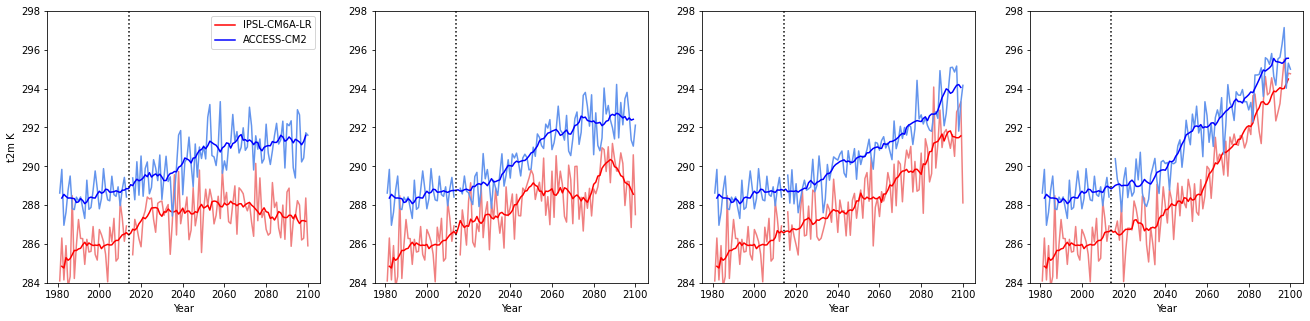

In [9]:
ssps=['126','245','370','585']
fig = plt.figure(figsize=(22.5,5))

i=1
for sp in ssps:
    
    x=np.arange(1981,2014)

    plt.subplot(1, 4, i)

    #plt.plot(x,EnsBCHist,label='Historical',color='gainsboro')
    plt.plot(x,t2mHistvals[0],color='lightcoral')
    plt.plot(x,t2mHistvals[1],color='cornflowerblue')
    x=np.arange(2016,2101)
    t2mFut=[]
# t2m Data
    folderString='/home/cccr/diptih/dipti/Data/ssp'+sp+'/IPSL-CM6A-LR/processed/'
    t2mDataIPSL = xr.open_dataset(folderString+'Regrid_tas_day_IPSL-CM6A-LR_ssp'+sp+'_r1i1p1f1_gr_20150101-21001231.nc')
    t2mDataIPSL.tas.time[0]
    histt2mIPSL=t2mDataIPSL.sel(latitude=slice(32,24),longitude=slice(74,86)).tas
#histt2m[0].values
    histt2mIPSL[1].values
    histt2mIPSL.values=histt2mIPSL.values*mask

# Area Average
    t2mTS1=histt2mIPSL.mean(dim=['latitude','longitude'], skipna=True)

    t2mTs=(t2mTS1[((t2mTS1.time.dt.month>11) | (t2mTS1.time.dt.month<2)) ].sel(time=slice('2015-12-1','2100-1-31')))
    #x=np.arange(1981,2014)
    histt2mTs=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
        t2mT=t2mTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histt2mTs.append(t2mT.mean())
    t2mFut.append(histt2mTs) 

    # t2m Data
    folderString='/home/cccr/diptih/dipti/Data/ssp'+sp+'/ACCESS-CM2/processed/'
    t2mDataACCESS = xr.open_dataset(folderString+'Regrid_tas_day_ACCESS-CM2_ssp'+sp+'_r1i1p1f1_gn_20150101-21001231.nc')
    t2mDataACCESS.tas.time[0]
    histt2m=t2mDataACCESS.sel(latitude=slice(32,24),longitude=slice(74,86)).tas

#histt2m.values=histt2m.values-histt2m[0].values
    histt2m[1].values
    histt2m.values=histt2m.values*mask


# Area Average
    t2mTS1=histt2m.mean(dim=['latitude','longitude'], skipna=True)

    t2mTs=(t2mTS1[((t2mTS1.time.dt.month>11) | (t2mTS1.time.dt.month<2)) ].sel(time=slice('2015-12-1','2100-1-31')))
    histt2mTs=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T12:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T12:00:00')
   # print(EnDString)
        t2mT=t2mTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histt2mTs.append(t2mT.mean())
    t2mFut.append(histt2mTs)

    histt2mTs=[]
    for yr in x :
        InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
        EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
        t2mT=t2mTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
        histt2mTs.append(t2mT.mean())
    t2mFut.append(histt2mTs)
    plt.plot(x,t2mFut[0],color='lightcoral')
    jointList=t2mHistvals[0]+t2mFut[0]
    S = pd.Series (jointList)
    xTotal=np.arange(1982,2100)
    rENS=S.rolling(10, center=True, min_periods=1).mean()
    plt.plot(xTotal,rENS,label='IPSL-CM6A-LR',color='red')
    plt.plot(x,t2mFut[1],color='cornflowerblue')
    jointList=t2mHistvals[1]+t2mFut[1]
    S = pd.Series (jointList)
    xTotal=np.arange(1982,2100)
    rENS=S.rolling(10, center=True, min_periods=1).mean()
    plt.plot(xTotal,rENS,label='ACCESS-CM2',color='blue')
    plt.ylim(284,298)
    plt.axvline(x=2014,color='black',linestyle=':')
    plt.xlabel('Year') 
    if i == 1:
        plt.legend()
        plt.ylabel('t2m K')
    i=i+1

plt.savefig('Models_t2m_10YearMean.eps')
plt.show()
        